<h1> Building a simple AutoEncoder </h1>
<h3>What are autoencoders?</h3>

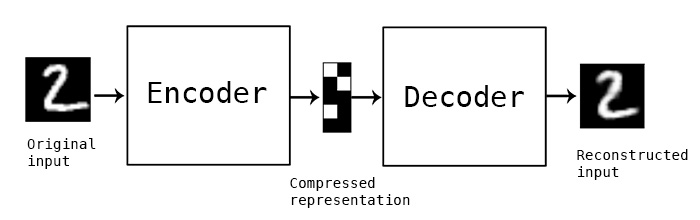

"Autoencoding" is a data compression algorithm where the compression and decompression functions are :
> * Autoencoders are data-specific, which means that they will only be able to compress data similar to what they have been trained on.
> * Autoencoders are lossy, which means that the decompressed outputs will be degraded compared to the original inputs.
> * Autoencoders are learned automatically from data examples, which is a useful property: it means that it is easy to train specialized instances of the algorithm that will perform well on a specific type of input. 

In [1]:
import tensorflow 
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt

In [2]:
encoding_dim = 32  
input_img = tensorflow.keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
# This model maps an input to its reconstruction
autoencoder =tensorflow.keras.Model(input_img, decoded)

In [3]:
encoder = tensorflow.keras.Model(input_img, encoded)

In [4]:
encoded_input=tensorflow.keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = tensorflow.keras.Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

In [7]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [8]:
History=autoencoder.fit(X_train,X_train,epochs=50,batch_size=256,shuffle=True,validation_data=(X_test, X_test),callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
  1/235 [..............................] - ETA: 0s - loss: 0.6966WARNING:tensorflow:From D:\Anaconda\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
235/235 [==============================] - 3s 14ms/step - loss: 0.2796 - val_loss: 0.1861
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1686 - val_loss: 0.1531
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1443 - val_loss: 0.1340
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1290 - val_loss: 0.1223
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1191 - val_loss: 0.1138
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1119 - val_loss: 0.1077
Epoch 7/50
235/235 [==============================] - 2s 11ms

In [9]:
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [10]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

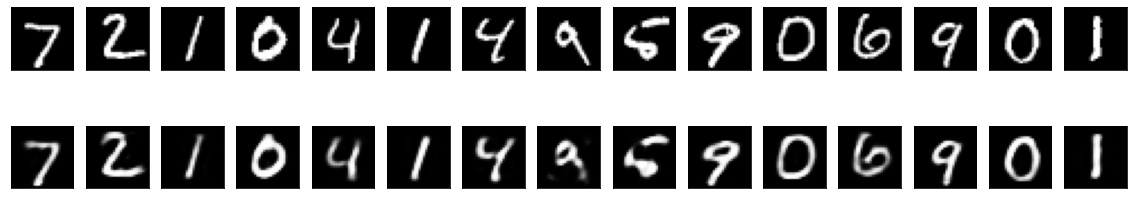

In [11]:
import matplotlib.pyplot as plt

n = 15  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Building Deep AutoEncoder

Let's try out building a AutoEncoder with some layers ,We do not have to limit ourselves to a single layer as encoder or decoder, we could instead use a stack of layers

In [12]:
input_img =tensorflow.keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [13]:
autoencoder = tensorflow.keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train,X_train,epochs=100,batch_size=256,shuffle=True,validation_data=(X_test,X_test),callbacks=[TensorBoard(log_dir='/tmp/autoencoder2')])

Epoch 1/100
235/235 [==============================] - 5s 19ms/step - loss: 0.2420 - val_loss: 0.1681
Epoch 2/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1534 - val_loss: 0.1398
Epoch 3/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1336 - val_loss: 0.1260
Epoch 4/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1225 - val_loss: 0.1167
Epoch 5/100
235/235 [==============================] - 3s 15ms/step - loss: 0.1155 - val_loss: 0.1112
Epoch 6/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1110 - val_loss: 0.1077
Epoch 7/100
235/235 [==============================] - 3s 15ms/step - loss: 0.1077 - val_loss: 0.1046
Epoch 8/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1048 - val_loss: 0.1023
Epoch 9/100
235/235 [==============================] - 3s 15ms/step - loss: 0.1027 - val_loss: 0.1007
Epoch 10/100
235/235 [==============================] - 3s 14ms/step - loss: 0.101

In [14]:
decoded_imgs =autoencoder.predict(X_test)

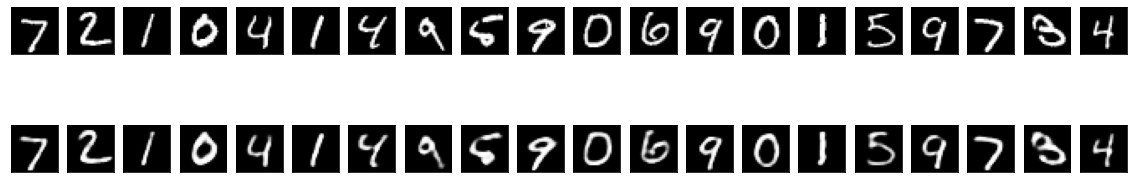

In [15]:
import matplotlib.pyplot as plt

n = 20 # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

<h1> Convolutional AutoEncoder</h1>

Since our inputs are images, it makes sense to use convolutional neural networks (convnets) as encoders and decoders. In practical settings, autoencoders applied to images are always convolutional autoencoders --they simply perform much better.

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test= X_test.astype('float32') / 255.
X_train= np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))

In [3]:
input_img = tensorflow.keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tensorflow.keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [4]:
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 32)       

In [5]:
autoencoder.fit(X_train,X_train,epochs=50, batch_size=128,shuffle=True,validation_data=(X_test, X_test),callbacks=[TensorBoard(log_dir='/tmp/autoencoder_conv')])

Epoch 1/50
  1/469 [..............................] - ETA: 0s - loss: 0.6942WARNING:tensorflow:From D:\Anaconda\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
469/469 [==============================] - 80s 170ms/step - loss: 0.1133 - val_loss: 0.0761
Epoch 2/50
469/469 [==============================] - 77s 165ms/step - loss: 0.0744 - val_loss: 0.0717
Epoch 3/50
469/469 [==============================] - 80s 170ms/step - loss: 0.0714 - val_loss: 0.0698
Epoch 4/50
469/469 [==============================] - 80s 171ms/step - loss: 0.0697 - val_loss: 0.0685
Epoch 5/50
469/469 [==============================] - 81s 174ms/step - loss: 0.0686 - val_loss: 0.0677
Epoch 6/50
469/469 [==============================] - 81s 172ms/step - loss: 0.0679 - val_loss: 0.0670
Epoch 7/50
469/469 [============================

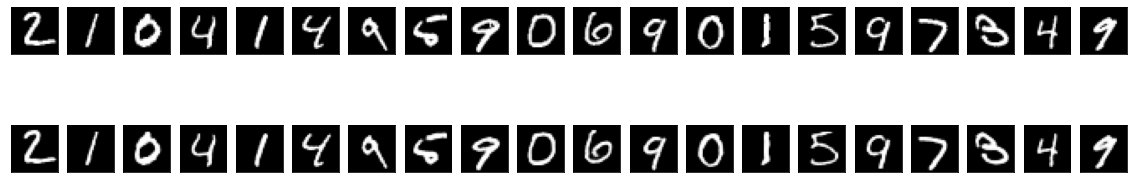

In [6]:
decoded_imgs = autoencoder.predict(X_test)
n = 20
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

<b> Results shown above are much clear than simple autoencoder and deep autoencoder.</b>

# Image Denoising Using AutoEncoder

In [2]:
(x_train,y_train),(x_test,y_train) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

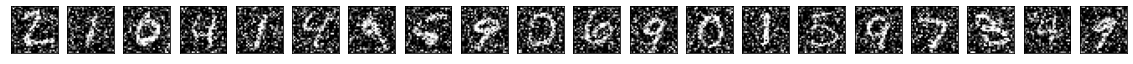

In [8]:
n =20
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [6]:
input_img =tensorflow.keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_noisy =tensorflow.keras.Model(input_img, decoded)
autoencoder_noisy.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
autoencoder_noisy.fit(x_train_noisy, x_train,epochs=20,batch_size=128,shuffle=True,validation_data=(x_test_noisy, x_test))

Epoch 1/20
469/469 [==============================] - 186s 396ms/step - loss: 0.1584 - val_loss: 0.1185
Epoch 2/20
469/469 [==============================] - 171s 365ms/step - loss: 0.1126 - val_loss: 0.1086
Epoch 3/20
469/469 [==============================] - 167s 355ms/step - loss: 0.1074 - val_loss: 0.1048
Epoch 4/20
469/469 [==============================] - 182s 389ms/step - loss: 0.1048 - val_loss: 0.1029
Epoch 5/20
469/469 [==============================] - 176s 376ms/step - loss: 0.1031 - val_loss: 0.1016
Epoch 6/20
469/469 [==============================] - 170s 362ms/step - loss: 0.1018 - val_loss: 0.1003
Epoch 7/20
469/469 [==============================] - 167s 356ms/step - loss: 0.1007 - val_loss: 0.0995
Epoch 8/20
469/469 [==============================] - 166s 355ms/step - loss: 0.0999 - val_loss: 0.0988
Epoch 9/20
469/469 [==============================] - 167s 355ms/step - loss: 0.0993 - val_loss: 0.0985
Epoch 10/20
469/469 [==============================] - 166s 354m

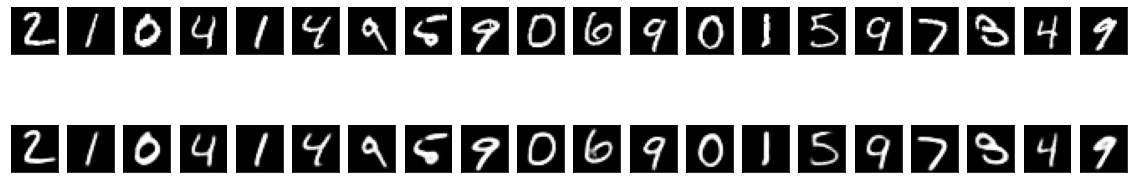

In [9]:
decoded_imgs = autoencoder_noisy.predict(x_test)
n = 20
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()